In [1]:
import gzip
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:

from matplotlib.colors import LogNorm
fontsize = 18
def hist1d(x1,x2,xlabel:str = '',density = True, bins = 'auto'):
    plt.figure(figsize=(8, 6))
    #bins = np.linspace(0, max(np.max(x1),np.max(x2)), 50) if predefined_bins else 'auto'
    n1, bins, patches = plt.hist(x1, bins=bins, density=density, histtype='step', label='Independent Geant4', color='orange', linewidth=2.5)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    errors1 = np.sqrt(n1)
    if not density: plt.errorbar(bin_centers, n1, yerr=errors1, color='orange',fmt='none')
    n2, _, _ = plt.hist(x2, bins=bins, density=density, histtype='step', label='FairShip', color='blue')
    errors2 = np.sqrt(n2)
    if not density: plt.errorbar(bin_centers, n2, yerr=errors2, color='blue',fmt='none')
    plt.xlabel(xlabel,fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.tight_layout()
    plt.tick_params(axis='both', which='major', labelsize=fontsize)  # Major ticks
    plt.tick_params(axis='both', which='minor', labelsize=fontsize)  # Minor ticks (if needed)


def hist2d(x,x_fs):
    fig,axes = plt.subplots(1,2,figsize=(10, 5), sharey = True,sharex=True)
    fig.tight_layout()
    h1, xedges, yedges, im1 = axes[0].hist2d(*x, bins=50, cmap='viridis', norm=LogNorm())
    axes[0].set_xlabel('$|P|$ [GeV]',fontsize=fontsize)
    axes[0].set_ylabel('$P_t$ [GeV]',fontsize=fontsize)
    axes[0].set_title('New',fontsize=fontsize)
    axes[1].hist2d(*x_fs, bins=[xedges, yedges], cmap='viridis', norm=LogNorm())
    axes[1].set_xlabel('$|P|$ [GeV]',fontsize=fontsize)
    axes[1].set_title('Old',fontsize=fontsize)
    fig.colorbar(im1, ax=axes,label='Counts')
    for ax in axes:
        ax.tick_params(axis='both', which='major', labelsize=fontsize)  # Major ticks
        ax.tick_params(axis='both', which='minor', labelsize=fontsize)  # Minor ticks (if any)

def difference_hist1d(x1,x2,xlabel:str = '',density = True, bins = 'auto'):
    n1, bins, patches = plt.hist(x1, bins=bins, density=density, histtype='step', label='Independent Geant4', color='orange', linewidth=2.5)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    n2, _, _ = plt.hist(x2, bins=bins, density=density, histtype='step', label='FairShip', color='blue')
    diff = n1-n2
    plt.close()
    bin_centers = 0.5 * (bins[:-1] + bins[1:])  # Calculate bin centers for plotting

    plt.figure(figsize=(8, 6))
    plt.bar(bin_centers, diff, width=np.diff(bins), color='blue', edgecolor='black', alpha=0.7)

    plt.xlabel(xlabel,fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.tight_layout()
    plt.tick_params(axis='both', which='major', labelsize=fontsize)  # Major ticks
    plt.tick_params(axis='both', which='minor', labelsize=fontsize)  # Minor ticks (if needed)


In [3]:
with gzip.open('enriched_input.pkl', 'rb') as f:
    data = pickle.load(f)

with gzip.open('inputs.pkl', 'rb') as f:
    data_old = pickle.load(f)

In [4]:
px,py,pz,x,y,z,pdg,W = data.T
pt = np.sqrt(px**2+py**2)
p = np.sqrt(px**2+py**2+pz**2)

px_old,py_old,pz_old,x_old,y_old,z_old,pdg_old= data_old.T
pt_old = np.sqrt(px_old**2+py_old**2)
p_old = np.sqrt(px_old**2+py_old**2+pz_old**2)

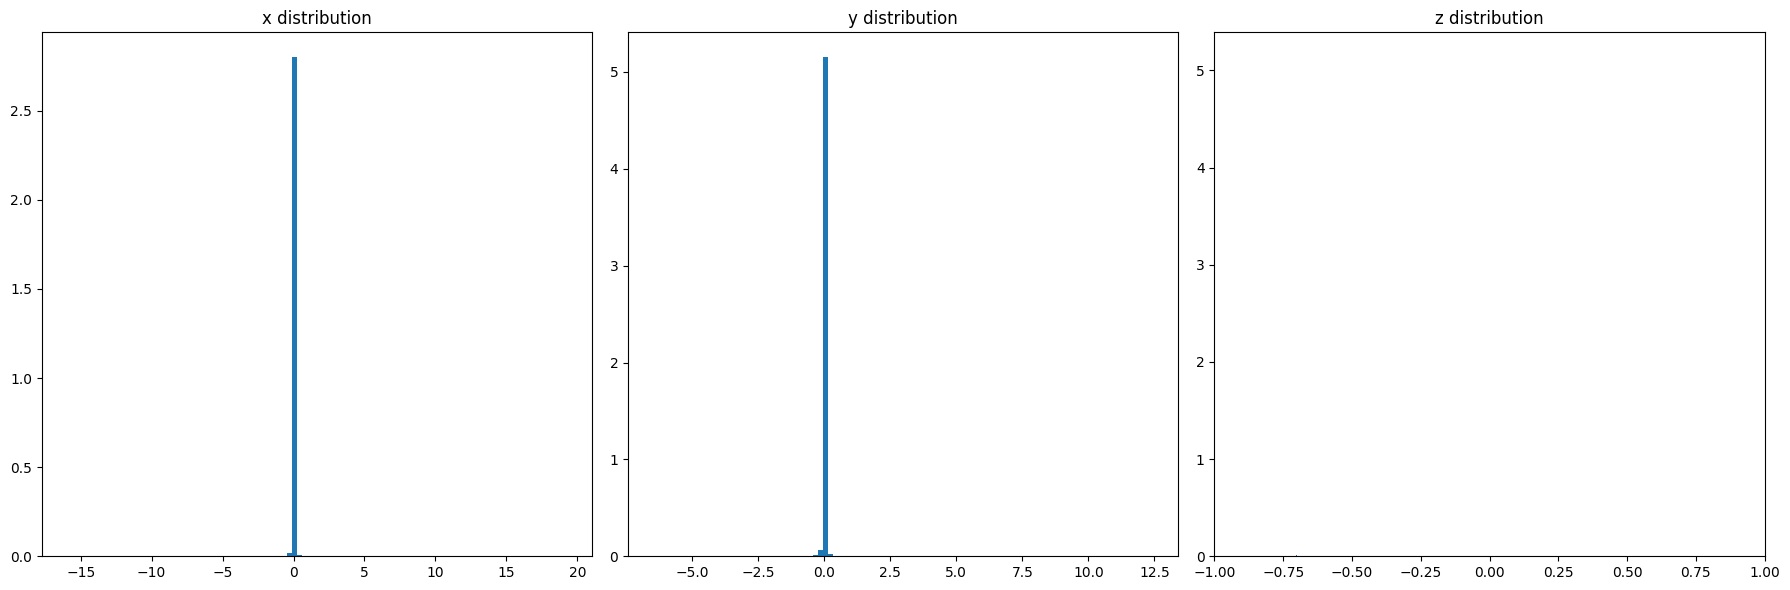

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].hist(x*100, bins=100, density = True)
axes[0].set_title('x distribution')

axes[1].hist(y*100, bins=100, density = True)
axes[1].set_title('y distribution')

axes[2].hist(z, bins='auto', density = True)
axes[2].set_title('z distribution')
axes[2].set_xlim(-1,1)
plt.tight_layout()
plt.show()

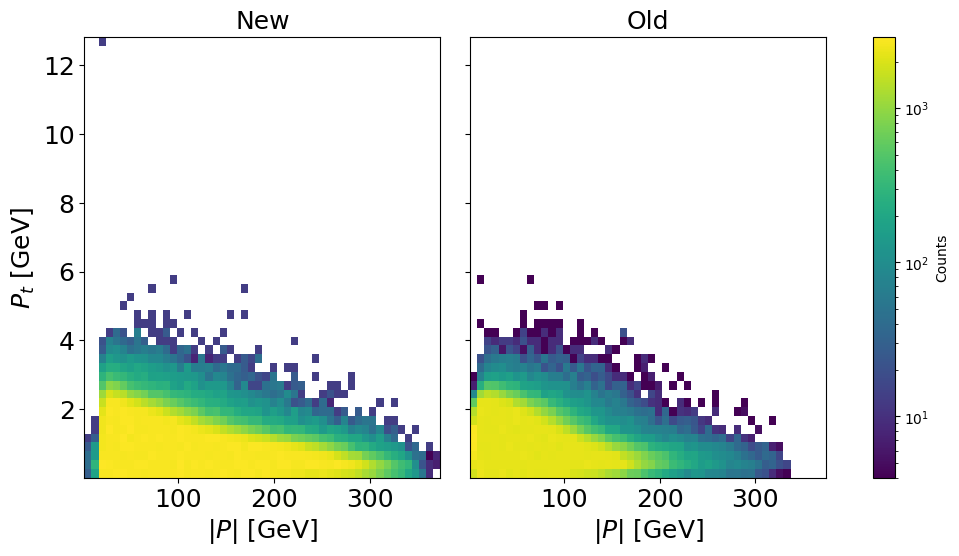

In [7]:
hist2d((p,pt),(p_old,pt_old))